In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
werewolf_df = pd.read_csv("Resources/werewolf_data.csv")
werewolf_df.head()

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99


In [4]:
emergency_reason = werewolf_df["Emergency Reason"]
responder = emergency_reason.str.split(pat=":", n=- 1, expand=True)
werewolf_df["Responder"] = responder[0]
werewolf_df["Emergency Reason"] = responder[1]

werewolf_df = werewolf_df[["lat", "lng", "zip", "Emergency Reason", "Responder", "Town/City", "Date", "Moon Phase"]]
werewolf_df

,lat,lng,zip,Emergency Reason,Responder,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,BACK PAINS/INJURY,EMS,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,DIABETIC EMERGENCY,EMS,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,GAS-ODOR/LEAK,Fire,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,CARDIAC EMERGENCY,EMS,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,DIZZINESS,EMS,LOWER POTTSGROVE,2015-12-10,0.99
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,VEHICLE ACCIDENT -,Traffic,EAST NORRITON,2020-07-29,NaN
663518,40.136306,-75.428697,19403.0,GENERAL WEAKNESS,EMS,LOWER PROVIDENCE,2020-07-29,NaN
663519,40.013779,-75.300835,19041.0,VEHICLE ACCIDENT,EMS,LOWER MERION,2020-07-29,NaN
663520,40.121603,-75.351437,19401.0,BUILDING FIRE,Fire,NORRISTOWN,2020-07-29,NaN


<IPython.core.display.Javascript object>


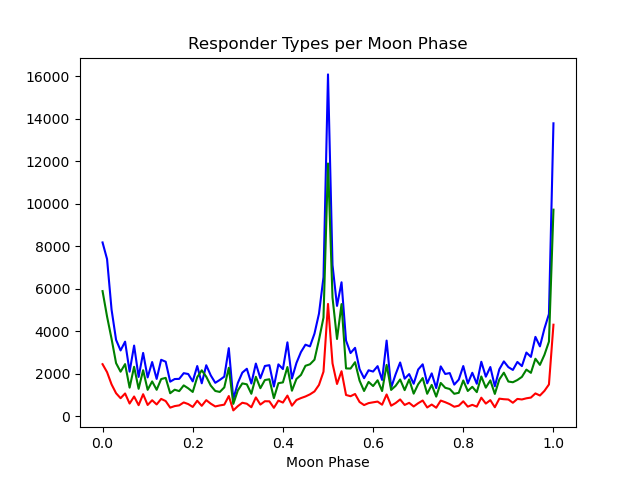

Text(0.5, 1.0, 'Responder Types per Moon Phase')

In [5]:
# TALHA
# Responder vs moon phase
#     Case statement
#     
#     Group Emergency Reason
    #     Which emergency appears more in which moon phase
    #     bar chart Emergency Reason
#         LINE GRAPH!!
EMS_line= werewolf_df.loc[werewolf_df["Responder"]=="EMS"]
EMS_line=EMS_line.groupby("Moon Phase")
EMS_line=EMS_line["Emergency Reason"].count().plot(kind="line", color="b")
plt.title ("Responder Types per Moon Phase")

In [6]:
Fire_line= werewolf_df.loc[werewolf_df["Responder"]=="Fire"]
Fire_line=Fire_line.groupby("Moon Phase")
Fire_line=Fire_line["Emergency Reason"].count().plot(kind="line", color="r")

In [7]:
Traffic_line= werewolf_df.loc[werewolf_df["Responder"]=="Traffic"]
Traffic_line=Traffic_line.groupby("Moon Phase")
Traffic_line=Traffic_line["Emergency Reason"].count().plot(kind="line", color="g")

In [9]:
plt.savefig ("ResponderType_MoonPhase_Talha.png")